# 0.0 Imports

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 0.1 Data Load

In [27]:
df_raw = pd.read_csv('../../projeto/data/raw/previous_application.csv')

ParserError: Error tokenizing data. C error: out of memory

In [ ]:
df_train = pd.read_csv('../../projeto/data/raw/application_train.csv')

In [ ]:
df_description = pd.read_csv('../../projeto/data/raw/HomeCredit_columns_description.csv', encoding='latin1', index_col = 0)

# 1.0 Data Description

In [28]:
df1 = df_raw.copy()

In [29]:
df1.head().T

,0,1,2,3,4
SK_ID_PREV,2030495,2802425,2523466,2819243,1784265
SK_ID_CURR,271877,108129,122040,176158,202054
NAME_CONTRACT_TYPE,Consumer loans,Cash loans,Cash loans,Cash loans,Cash loans
AMT_ANNUITY,1730.43,25188.615,15060.735,47041.335,31924.395
AMT_APPLICATION,17145.0,607500.0,112500.0,450000.0,337500.0
AMT_CREDIT,17145.0,679671.0,136444.5,470790.0,404055.0
AMT_DOWN_PAYMENT,0.0,NaN,NaN,NaN,NaN
AMT_GOODS_PRICE,17145.0,607500.0,112500.0,450000.0,337500.0
WEEKDAY_APPR_PROCESS_START,SATURDAY,THURSDAY,TUESDAY,MONDAY,THURSDAY
HOUR_APPR_PROCESS_START,15,11,11,7,9


## 1.1 Feature description

In [30]:
pd.set_option('display.max_colwidth', None)
df_description.loc[ df_description['Table'] == 'previous_application.csv' ].reset_index(drop = 1).head(50)

,Table,Row,Description,Special
0,previous_application.csv,SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit)",hashed
1,previous_application.csv,SK_ID_CURR,ID of loan in our sample,hashed
2,previous_application.csv,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application",NaN
3,previous_application.csv,AMT_ANNUITY,Annuity of previous application,NaN
4,previous_application.csv,AMT_APPLICATION,For how much credit did client ask on the previous application,NaN
5,previous_application.csv,AMT_CREDIT,"Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT",NaN
6,previous_application.csv,AMT_DOWN_PAYMENT,Down payment on the previous application,NaN
7,previous_application.csv,AMT_GOODS_PRICE,Goods price of good that client asked for (if applicable) on the previous application,NaN
8,previous_application.csv,WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply for previous application,NaN
9,previous_application.csv,HOUR_APPR_PROCESS_START,Approximately at what day hour did the client apply for the previous application,rounded


## 1.2 Data shape

In [31]:
df1.shape

(1670214, 37)

## 1.3 Check NaN

In [32]:
df1.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

## 1.4 Describe

In [33]:
df1.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


# 2.0 Feature Engineering

In [34]:
df2 = df1.copy()

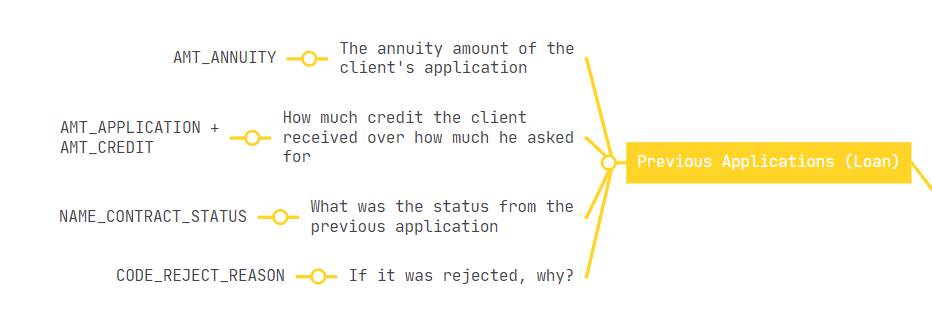

The features and EDA of credit card balance will be developed taking into consideration the business assumptions

In [35]:
df2.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [36]:
def installments_payments_feature_engineering(df_cleaned):

    df_featured = df_cleaned.copy()

    df_featured['ACCEPTED_CREDIT_PA'] = df_featured['AMT_APPLICATION'] / df_featured['AMT_CREDIT']

    df_featured['ACCEPTED_CREDIT_PA'] = df_featured.apply(lambda x: np.nan if x['AMT_CREDIT'] == 0 else x['ACCEPTED_CREDIT_PA'], axis = 1)

    df_featured = df_featured.groupby(['SK_ID_CURR']).agg(ACCEPTED_CREDICT_PA = ('ACCEPTED_CREDIT_PA','mean'),
                                                          LAST_CONTRACT_STATUS_PA = ('NAME_CONTRACT_STATUS','last'),
                                                          AVG_AMOUNT_ANNUITY_PA = ('AMT_ANNUITY','mean'),
                                                          TTL_AMOUNT_ANNUITY_PA = ('AMT_ANNUITY','sum'),
                                                          SK_PREV_PA = ('SK_ID_PREV','count'),
                                                          MAX_AMT_APPLICATION_PA = ('AMT_APPLICATION','max'),
                                                          MAX_AMT_CREDIT_PA = ('AMT_CREDIT','max'),
                                                          LAST_REJECTED_PA = ('CODE_REJECT_REASON','last')
                                                          ).reset_index()

 
    return df_featured

In [37]:
def join_train_installments(df_train, df_installments):

    df_train = df_train[['SK_ID_CURR','TARGET']]

    df_merged = df_train.merge(df_installments, on = 'SK_ID_CURR', how = 'left', validate = 'one_to_one')

    return df_merged

In [38]:
def feature_analysis(df_final):

    df_analysis = df_final.copy()

    for col in df_analysis.select_dtypes('number').columns:
        if col not in ['SK_ID_CURR','TARGET']:	
            col_name = f'{col}_q'
            df_analysis[col_name] = pd.qcut(df_analysis[col], q = 4, duplicates='drop',labels=False)
            df_analysis.groupby(col_name)['TARGET'].mean().plot()
            plt.axhline(df_analysis['TARGET'].mean(), color = 'red', linestyle = '--')
            plt.ylim(bottom =0)
            plt.title(col)
            plt.show()


In [39]:
df_featured = installments_payments_feature_engineering(df2)

In [40]:
df_final = join_train_installments(df_train, df_featured)

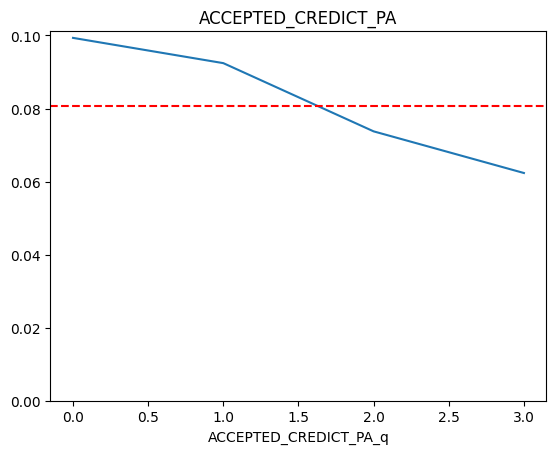

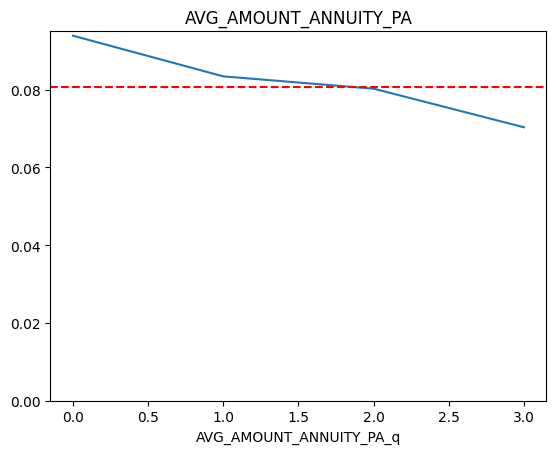

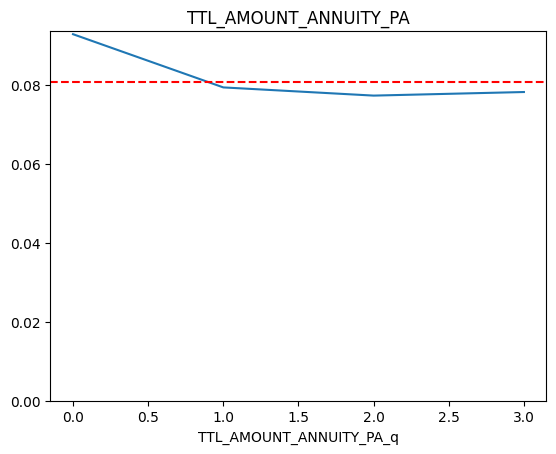

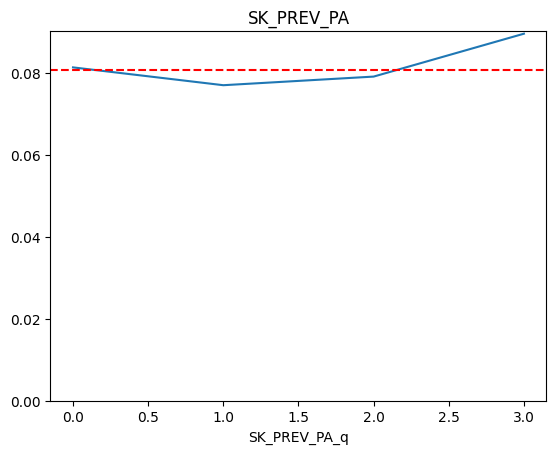

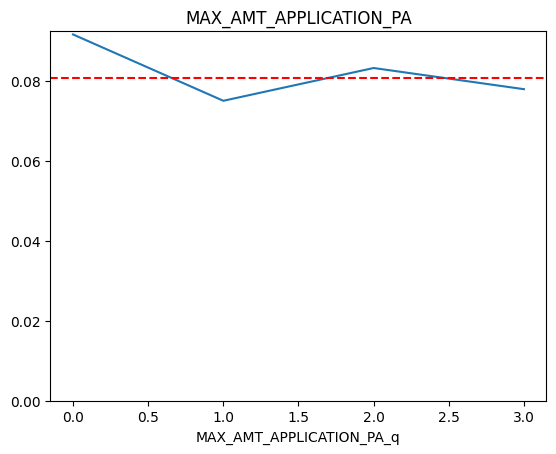

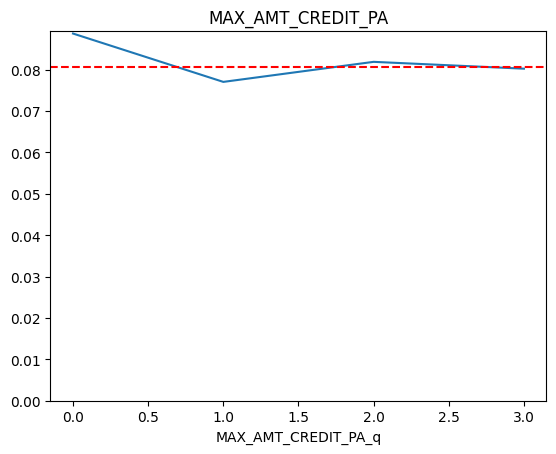

In [41]:
feature_analysis(df_final)

In [44]:
df_featured.to_parquet('../../projeto/data/featured/previous_application.parquet')

In [43]:
df_featured.describe()

,SK_ID_CURR,ACCEPTED_CREDICT_PA,AVG_AMOUNT_ANNUITY_PA,TTL_AMOUNT_ANNUITY_PA,SK_PREV_PA,MAX_AMT_APPLICATION_PA,MAX_AMT_CREDIT_PA
count,338857.000000,338605.000000,338377.000000,3.388570e+05,338857.000000,3.388570e+05,3.388570e+05
mean,278149.909581,0.969534,14656.028970,6.111549e+04,4.928964,3.775473e+05,4.167555e+05
std,102879.193103,0.170346,10093.856491,7.377579e+04,4.220716,4.219383e+05,4.574522e+05
min,100001.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,0.000000e+00
25%,189061.000000,0.908345,7908.423750,1.610820e+04,2.000000,9.957150e+04,1.061505e+05
50%,278221.000000,0.971373,12092.197500,3.691044e+04,4.000000,2.105100e+05,2.250000e+05
75%,367302.000000,1.026467,18489.159000,7.816680e+04,7.000000,4.635000e+05,5.539500e+05
max,456255.000000,10.000000,300425.445000,2.051103e+06,77.000000,6.905160e+06,6.905160e+06
